In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from minisom import MiniSom
import cartopy.crs as ccrs
from cartopy.io.img_tiles import Stamen

In [2]:
prob1 = pd.read_csv('data_problem1.csv')

(671, 57)


Text(0, 0.5, 'Variance Explained')

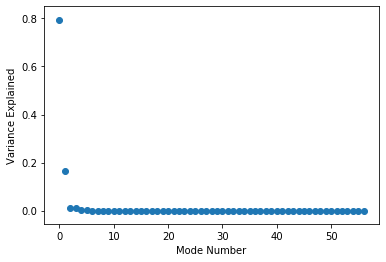

In [3]:
n_modes = np.min(np.shape(prob1))
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(prob1)

eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

print(PCs.shape)
plt.scatter(np.arange(fracVar.size),fracVar)
plt.xlabel("Mode Number")
plt.ylabel("Variance Explained")

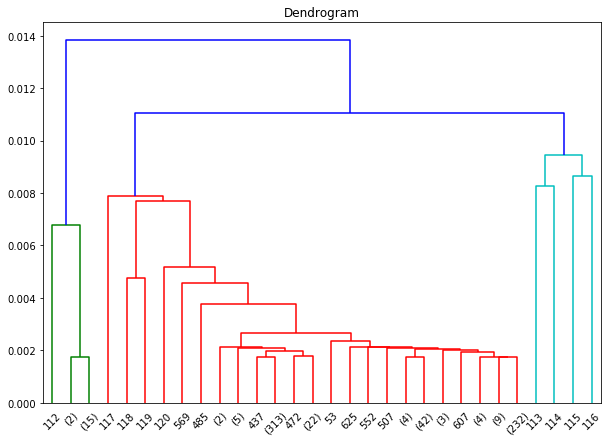

In [4]:
data = PCs[:,:2]
linked = linkage(data)

plt.figure(figsize=(10, 7))
dendrogram(linked, 
           orientation='top', 
           distance_sort='descending',
           truncate_mode='lastp',
           p=30)
plt.title('Dendrogram')
plt.show()

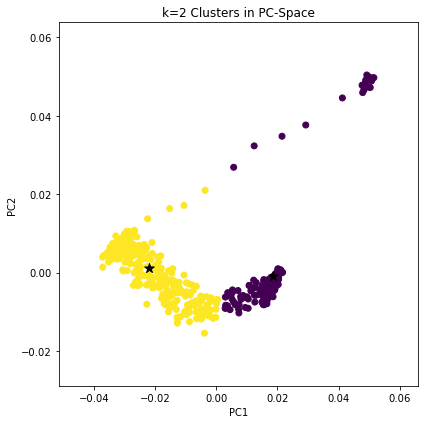

In [5]:
n_clusters = 2
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  affinity='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data)

cluster_pattern_PC = np.empty((n_clusters,np.shape(data)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(cn==cluster_num)
    cluster_pattern_PC[cluster_num,:] = np.mean(data[inds,:],axis=0)


#visualized clustered data in PC-space

plt.figure(figsize=(6,6))

plt.subplot(111)
plt.scatter(PCs[:,0],PCs[:,1],c=cn)
plt.scatter(cluster_pattern_PC[:,0],cluster_pattern_PC[:,1],marker='*',c='k',s=100)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.title('k=2 Clusters in PC-Space')

plt.tight_layout()
plt.show()

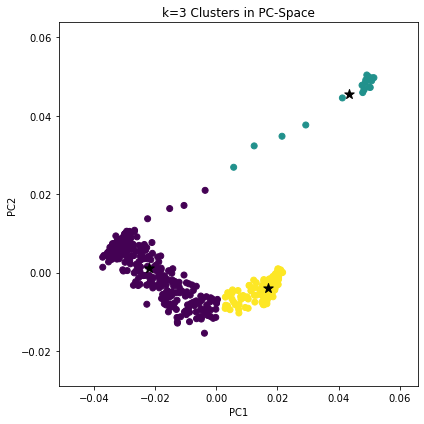

In [6]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  affinity='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data)

cluster_pattern_PC = np.empty((n_clusters,np.shape(data)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(cn==cluster_num)
    cluster_pattern_PC[cluster_num,:] = np.mean(data[inds,:],axis=0)


#visualized clustered data in PC-space

plt.figure(figsize=(6,6))

plt.subplot(111)
plt.scatter(PCs[:,0],PCs[:,1],c=cn)
plt.scatter(cluster_pattern_PC[:,0],cluster_pattern_PC[:,1],marker='*',c='k',s=100)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.title('k=3 Clusters in PC-Space')

plt.tight_layout()
plt.show()

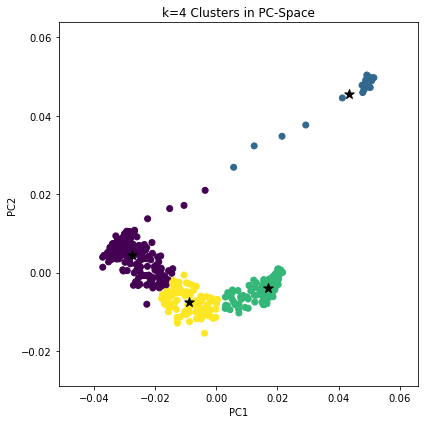

In [7]:
n_clusters = 4
cluster = AgglomerativeClustering(n_clusters=n_clusters, 
                                  affinity='euclidean', 
                                  linkage='ward')
cn = cluster.fit_predict(data)

cluster_pattern_PC = np.empty((n_clusters,np.shape(data)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(cn==cluster_num)
    cluster_pattern_PC[cluster_num,:] = np.mean(data[inds,:],axis=0)


#visualized clustered data in PC-space

plt.figure(figsize=(6,6))

plt.subplot(111)
plt.scatter(PCs[:,0],PCs[:,1],c=cn)
plt.scatter(cluster_pattern_PC[:,0],cluster_pattern_PC[:,1],marker='*',c='k',s=100)
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.title('k=4 Clusters in PC-Space')

plt.tight_layout()
plt.show()

## d)

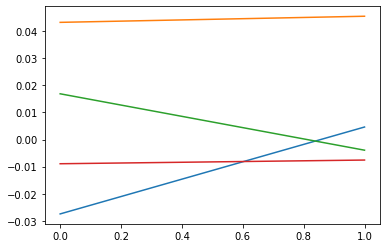

In [8]:
plt.plot(cluster_pattern_PC.T)
###?????####

Text(0, 0.5, 'Cluster Number - 1')

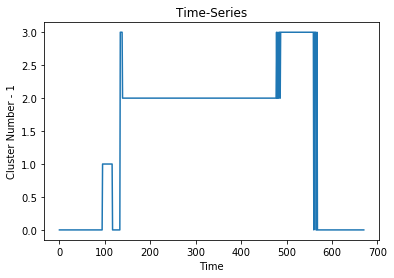

In [9]:
plt.plot(cn)
plt.title("Time-Series")
plt.xlabel("Time")
plt.ylabel("Cluster Number - 1")

# Question 2

## a)

(193, 365)
193


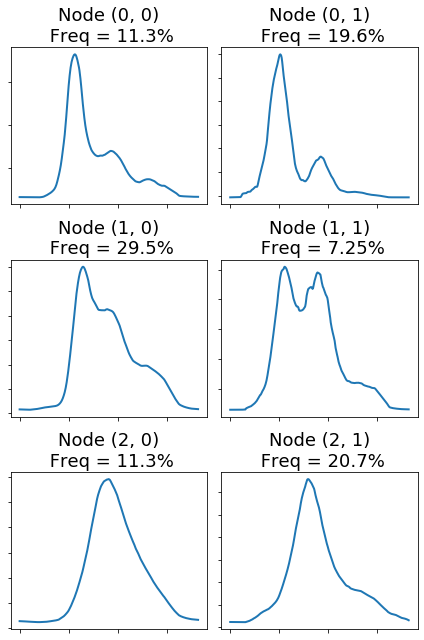

In [10]:
prob2 = pd.read_csv('data_problem2.csv')

#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 2
ny = 3

data = prob2.to_numpy()

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

print(qnt.shape)

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*ny + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))

print(len(bmus))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

#visualize
plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy], linewidth = 2)
    plt.title('Node ' + str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%', fontsize = 18)
    plt.tick_params(labelbottom = False, labelleft = False)
    
plt.tight_layout()



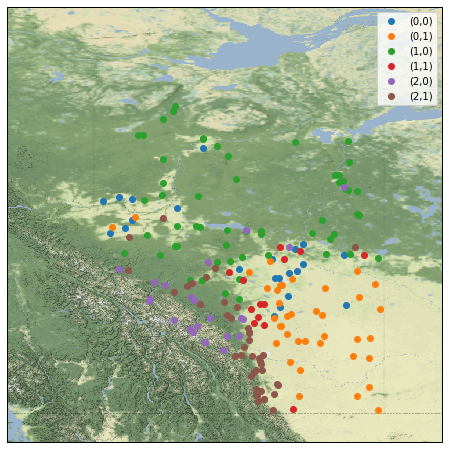

In [11]:
#My map plots###########################
lats = pd.read_csv('stationLat.csv')
lons = pd.read_csv('stationLon.csv')
lats = lats.to_numpy()
lons = lons.to_numpy()

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
i = 0

for bmu in bmus:
    if bmu[1] == 0 and bmu[0] == 0:
        cluster1.append([lons[i],lats[i]])
    elif bmu[1] == 0 and bmu[0] == 1:
        cluster2.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 0:
        cluster3.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 1:
        cluster4.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 0:
        cluster5.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 1:
        cluster6.append([lons[i],lats[i]])
    i = i + 1

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
cluster6 = np.array(cluster6)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
fig.add_axes(ax)

tiler = Stamen('terrain-background')
ax.add_image(tiler, 7)

ax.set_extent([-123, -108, 48, 63], crs=ccrs.PlateCarree())

ax.scatter(cluster1[:,0],cluster1[:,1],transform = ccrs.PlateCarree(), label = "(0,0)")
ax.scatter(cluster2[:,0],cluster2[:,1],transform = ccrs.PlateCarree(), label = "(0,1)")
ax.scatter(cluster3[:,0],cluster3[:,1],transform = ccrs.PlateCarree(), label = "(1,0)")
ax.scatter(cluster4[:,0],cluster4[:,1],transform = ccrs.PlateCarree(), label = "(1,1)")
ax.scatter(cluster5[:,0],cluster5[:,1],transform = ccrs.PlateCarree(), label = "(2,0)")
ax.scatter(cluster6[:,0],cluster6[:,1],transform = ccrs.PlateCarree(), label = "(2,1)")

ax.legend()

## b)

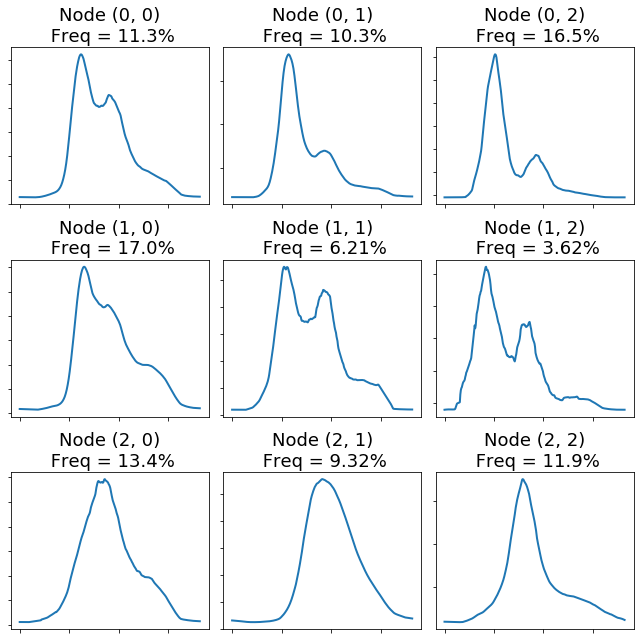

In [12]:
prob2 = pd.read_csv('data_problem2.csv')

#run SOM -- this code creates/trains the SOM and calculates stats of interest

nx = 3
ny = 3

data = prob2.to_numpy()

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

#calculate the BMU of each observation
bmus = []
bmus_num = []
for kk in range(len(data)):
    bmus.append(som.winner(data[kk]))
    num = bmus[kk][0]*ny + bmus[kk][1]
    bmus_num.append(num)
    
#inds gives the sequential coordinates of each SOM node (useful for plotting)
inds = []
for ii in range(ny):
    for jj in range(nx):
        inds.append((ii,jj))
     
#compute the frequency of each BMU
freq = np.zeros((nx,ny))
for bmu in bmus:
    freq[bmu[0]][bmu[1]]+=1
freq/=len(data)

#visualize
plt.figure(figsize=(3*nx,3*ny))
for kk in range(nx*ny):   
    plt.subplot(ny,nx,kk+1)
    indx = inds[kk][1]
    indy = inds[kk][0]
    plt.plot(bmu_patterns[indx][indy], linewidth = 2)
    plt.title('Node ' + str(inds[kk]) + '\n Freq = ' + str(freq[indx][indy]*100)[:4] + '%', fontsize = 18)
    plt.tick_params(labelbottom = False, labelleft = False)
    
plt.tight_layout()

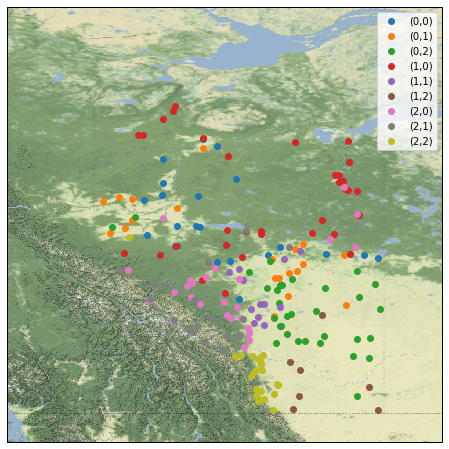

In [13]:
#My map plots###########################
lats = pd.read_csv('stationLat.csv')
lons = pd.read_csv('stationLon.csv')
lats = lats.to_numpy()
lons = lons.to_numpy()

cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []
i = 0

for bmu in bmus:
    if bmu[1] == 0 and bmu[0] == 0:
        cluster1.append([lons[i],lats[i]])
    elif bmu[1] == 0 and bmu[0] == 1:
        cluster2.append([lons[i],lats[i]])
    elif bmu[1] == 0 and bmu[0] == 2:
        cluster3.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 0:
        cluster4.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 1:
        cluster5.append([lons[i],lats[i]])
    elif bmu[1] == 1 and bmu[0] == 2:
        cluster6.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 0:
        cluster7.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 1:
        cluster8.append([lons[i],lats[i]])
    elif bmu[1] == 2 and bmu[0] == 2:
        cluster9.append([lons[i],lats[i]])
    i = i + 1

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)
cluster4 = np.array(cluster4)
cluster5 = np.array(cluster5)
cluster6 = np.array(cluster6)
cluster7 = np.array(cluster7)
cluster8 = np.array(cluster8)
cluster9 = np.array(cluster9)

fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.PlateCarree())
fig.add_axes(ax)

tiler = Stamen('terrain-background')
ax.add_image(tiler, 7)

ax.set_extent([-123, -108, 48, 63], crs=ccrs.PlateCarree())

ax.scatter(cluster1[:,0],cluster1[:,1],transform = ccrs.PlateCarree(), label = "(0,0)")
ax.scatter(cluster2[:,0],cluster2[:,1],transform = ccrs.PlateCarree(), label = "(0,1)")
ax.scatter(cluster3[:,0],cluster3[:,1],transform = ccrs.PlateCarree(), label = "(0,2)")
ax.scatter(cluster4[:,0],cluster4[:,1],transform = ccrs.PlateCarree(), label = "(1,0)")
ax.scatter(cluster5[:,0],cluster5[:,1],transform = ccrs.PlateCarree(), label = "(1,1)")
ax.scatter(cluster6[:,0],cluster6[:,1],transform = ccrs.PlateCarree(), label = "(1,2)")
ax.scatter(cluster7[:,0],cluster7[:,1],transform = ccrs.PlateCarree(), label = "(2,0)")
ax.scatter(cluster8[:,0],cluster8[:,1],transform = ccrs.PlateCarree(), label = "(2,1)")
ax.scatter(cluster9[:,0],cluster9[:,1],transform = ccrs.PlateCarree(), label = "(2,2)")

ax.legend()

## c)

In [14]:
quants = []
topes = []

nx = 2
ny = 1

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [15]:
nx = 2
ny = 2

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [16]:
nx = 3
ny = 2

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [17]:
nx = 3
ny = 3

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [18]:
nx = 4
ny = 3

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [19]:
nx = 4
ny = 4

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [20]:
nx = 5
ny = 4

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [21]:
nx = 5
ny = 5

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

Text(0, 0.5, 'Error')

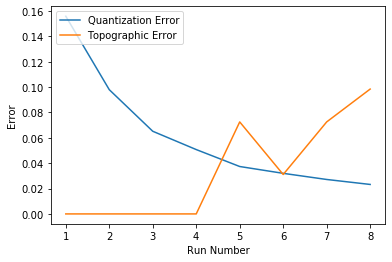

In [22]:
#Run numbers match what was recomended in the assignment

plt.plot(np.arange(1,9),quants, label="Quantization Error")
plt.plot(np.arange(1,9),topes, label="Topographic Error")
plt.legend(loc = "upper left")
plt.xlabel("Run Number")
plt.ylabel("Error")

## d)

In [23]:
quants = []
topes = []

nx = 2
ny = 1

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [24]:
nx = 1
ny = 2

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

Text(0, 0.5, 'Error')

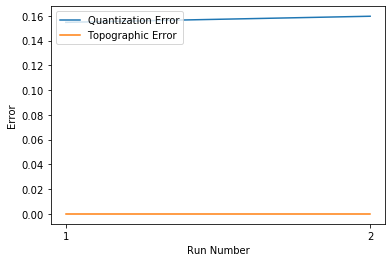

In [25]:
plt.plot(np.arange(1,3),quants, label="Quantization Error")
plt.plot(np.arange(1,3),topes, label="Topographic Error")
plt.xticks(np.arange(1,3))
plt.legend(loc = "upper left")
plt.xlabel("Run Number")
plt.ylabel("Error")

In [26]:
quants = []
topes = []

nx = 3
ny = 2

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [27]:
nx = 2
ny = 3

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [28]:
nx = 6
ny = 1

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [29]:
nx = 1
ny = 6

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

Text(0, 0.5, 'Error')

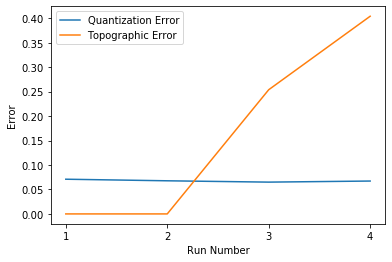

In [30]:
plt.plot(np.arange(1,5),quants, label="Quantization Error")
plt.plot(np.arange(1,5),topes, label="Topographic Error")
plt.xticks(np.arange(1,5))
plt.legend(loc = "upper left")
plt.xlabel("Run Number")
plt.ylabel("Error")

In [31]:
quants = []
topes = []

nx = 9
ny = 1

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [32]:
nx = 1
ny = 9

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

In [33]:
nx = 3
ny = 3

#make, initialize, and train the SOM
som = MiniSom(nx, ny, len(data[0]), sigma=0.5, learning_rate=0.5) # initialization of (ny x nx) SOM
#som.pca_weights_init(data)
som.random_weights_init(data)
som.train_random(data, 1000) # trains the SOM with 100 iterations

qnt = som.quantization(data) #this is the pattern of the BMU of each observation (ie: has same size as data input to SOM)
bmu_patterns = som.get_weights() #this is the pattern of each BMU; size = (nx, ny, len(data[0]))
QE = som.quantization_error(data) #quantization error of map
TE = som.topographic_error(data) #topographic error of map

quants.append(QE)
topes.append(TE)

Text(0, 0.5, 'Error')

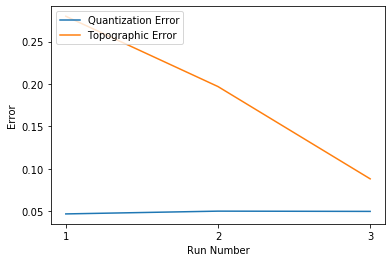

In [34]:
plt.plot(np.arange(1,4),quants, label="Quantization Error")
plt.plot(np.arange(1,4),topes, label="Topographic Error")
plt.xticks(np.arange(1,4))
plt.legend(loc = "upper left")
plt.xlabel("Run Number")
plt.ylabel("Error")